In [2]:
from tensorflow import keras
from keras.datasets import mnist

In [3]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [5]:
x_train.shape,y_train.shape

((60000, 28, 28), (60000,))

In [6]:
x_test.shape,y_test.shape

((10000, 28, 28), (10000,))

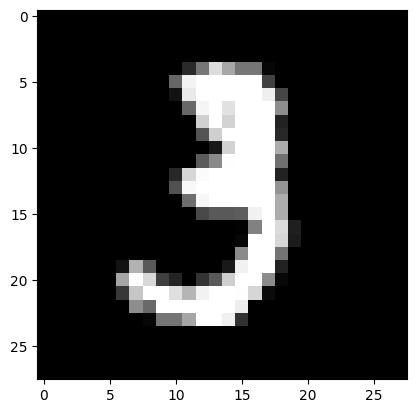

In [7]:
import matplotlib.pyplot as plt
plt.imshow(x_train[10],cmap='gray')
plt.show()

# Preprocessing

In [10]:
x_train = x_train.reshape((-1,28,28,1)).astype('float32') / 255
x_test = x_test.reshape((-1,28,28,1)).astype('float32') / 255

In [11]:
x_train.shape , x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

# Model Definition

In [14]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32,kernel_size=(3,3),strides = (1,1),padding = 'valid' , activation = 'relu' , input_shape = (28,28,1)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units=128,activation='relu'))
model.add(keras.layers.Dense(units=10,activation='softmax'))

c:\Users\Arash\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
import tensorflow as tf
model.compile(optimizer=tf.optimizers.Adam(),loss=tf.losses.sparse_categorical_crossentrophy,metrics=['accuracy'])
